In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_excel('ESG_WorldBank_20042023_AllCountries_transposed.xlsx', sheet_name='output')
df.head()

,Country Name,Continent,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annualized average growth rate in per capita real survey mean consumption or income, total population (%)",CO2 emissions (metric tons per capita),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Children in employment, total (% of children ages 7-14)",Coastal protection,Control of Corruption: Estimate,Cooling Degree Days,Economic and Social Rights Performance Score,Electricity production from coal sources (% of total),"Energy imports, net (% of energy use)",Energy intensity level of primary energy (MJ/$2017 PPP GDP),Energy use (kg of oil equivalent per capita),"Fertility rate, total (births per woman)",Food production index (2014-2016 = 100),Forest area (% of land area),Fossil fuel energy consumption (% of total),GDP growth (annual %),GHG net emissions/removals by LUCF (Mt of CO2 equivalent),Gini index,Government Effectiveness: Estimate,"Government expenditure on education, total (% of government expenditure)",Heat Index 35,Heating Degree Days,"Hospital beds (per 1,000 people)",Income share held by lowest 20%,Individuals using the Internet (% of population),"Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)",Land Surface Temperature,Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Mammal species, threatened",Methane emissions (metric tons of CO2 equivalent per capita),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Nitrous oxide emissions (metric tons of CO2 equivalent per capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Patent applications, residents",People using safely managed drinking water services (% of population),People using safely managed sanitation services (% of population),Political Stability and Absence of Violence/Terrorism: Estimate,Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Poverty headcount ratio at national poverty lines (% of population),Prevalence of overweight (% of adults),Prevalence of undernourishment (% of population),Proportion of bodies of water with good ambient water quality,Proportion of seats held by women in national parliaments (%),Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Regulatory Quality: Estimate,Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Research and development expenditure (% of GDP),Rule of Law: Estimate,"School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)",Scientific and technical journal articles,Standardised Precipitation-Evapotranspiration Index,Strength of legal rights index (0=weak to 12=strong),Terrestrial and marine protected areas (% of total territorial area),Tree Cover Loss (hectares),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Unmet need for contraception (% of married women ages 15-49),Voice and Accountability: Estimate
0,Afghanistan,Asia,AFG,2004,0.111,0.238142,NaN,NaN,0.581513,0.297211,0.430159,NaN,0.054867,NaN,NaN,NaN,-1.350647,1783.05,NaN,NaN,NaN,1.20,NaN,7.069,74.75,0.018528,NaN,0.014141,NaN,NaN,-0.945146,NaN,0.59,5200.56,0.39,NaN,0.001058,0.48079,30.753276,54.757019,57.944,NaN,NaN,0.445806,112.8,-248616.0,0.155651,NaN,NaN,0.138187,NaN,-2.295682,0.022966,36.112339,NaN,0.161,0.363,NaN,NaN,0.

In [4]:
print(df.shape)

(3820, 75)


In [5]:
null_counts = df.isnull().sum()
null_counts.sort_values(ascending=False)

Annualized average growth rate in per capita real survey mean consumption or income, total population (%)    3698
Proportion of bodies of water with good ambient water quality                                                3686
Mammal species, threatened                                                                                   3629
Children in employment, total (% of children ages 7-14)                                                      3598
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                                    3560
Unmet need for contraception (% of married women ages 15-49)                                                 3391
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)        3277
Literacy rate, adult total (% of people ages 15 and above)                                                   3181
Poverty headcount ratio at national poverty lines (% of population)                     

In [6]:
null_counts_italy = df[df["Country Name"] == "Italy"].isnull().sum()
null_counts_italy.sort_values(ascending=False)

Unmet need for contraception (% of married women ages 15-49)                                                 20
Proportion of bodies of water with good ambient water quality                                                20
Children in employment, total (% of children ages 7-14)                                                      20
Annualized average growth rate in per capita real survey mean consumption or income, total population (%)    19
Mammal species, threatened                                                                                   19
Literacy rate, adult total (% of people ages 15 and above)                                                   18
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)        17
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                                    14
Strength of legal rights index (0=weak to 12=strong)                                                    

In [7]:
nulls_by_continent = df.groupby('Continent').apply(lambda x: x.isnull().sum())
nulls_by_continent = nulls_by_continent.sort_index()
print(nulls_by_continent)

               Country Name  Continent  Country Code  Year  \
Continent                                                    
Africa                    0          0             0     0   
Asia                      0          0             0     0   
Europe                    0          0             0     0   
North America             0          0             0     0   
Oceania                   0          0             0     0   
South America             0          0             0     0   

               Access to clean fuels and technologies for cooking (% of population)  \
Continent                                                                             
Africa                                                       126                      
Asia                                                         102                      
Europe                                                       128                      
North America                                                 46    

C:\Users\Pancione\AppData\Local\Temp\ipykernel_19144\546703797.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulls_by_continent = df.groupby('Continent').apply(lambda x: x.isnull().sum())


# Access to services

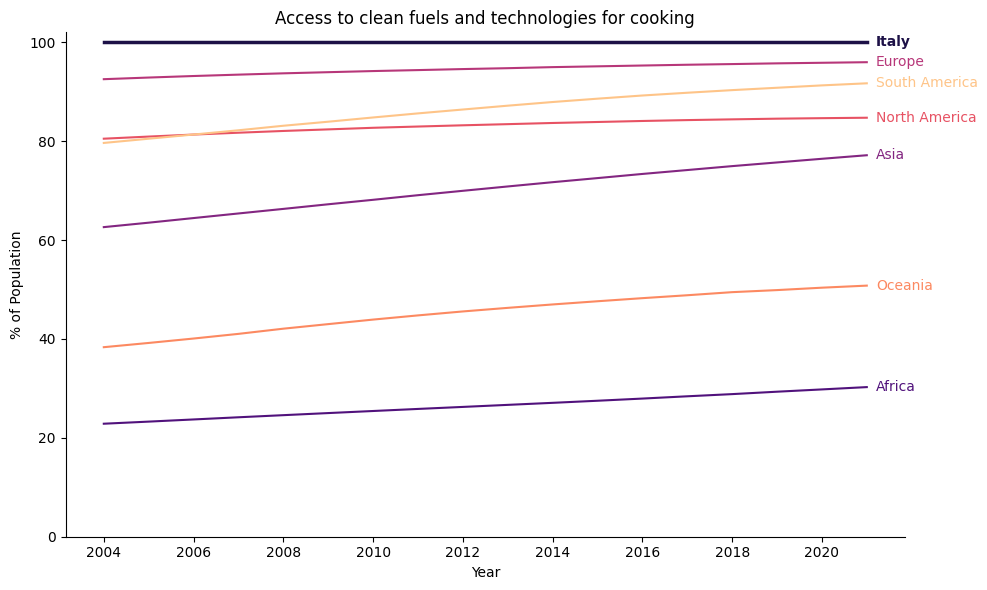

In [16]:
indicator = "Access to clean fuels and technologies for cooking (% of population)"

# Filter and prepare the data
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Compute the average value per continent per year
continent_means = df_valid.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Extract Italy's data as a separate copy
italy_data = df_valid[df_valid['Country Name'] == 'Italy'].copy()

# Convert all values to percentage format
continent_means.loc[:, indicator] = continent_means[indicator] * 100
italy_data.loc[:, indicator] = italy_data[indicator] * 100

# Palette
palette = sns.color_palette("magma", n_colors=len(continent_means['Continent'].unique()) + 1)
entities = ['Italy'] + list(continent_means['Continent'].unique())
color_map = dict(zip(entities, palette))

plt.figure(figsize=(10, 6))

# Linee dei continenti
for continent in continent_means['Continent'].unique():
    subset = continent_means[continent_means['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map[continent])
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

# Linea dell’Italia
plt.plot(
    italy_data['Year'],
    italy_data[indicator],
    linewidth=2.5,
    linestyle='-',
    color=color_map['Italy']
)
plt.text(
    italy_data['Year'].max() + 0.2,
    italy_data[indicator].iloc[-1],
    'Italy',
    verticalalignment='center',
    fontweight='bold',
    color=color_map['Italy']
)

plt.title("Access to clean fuels and technologies for cooking")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 102)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

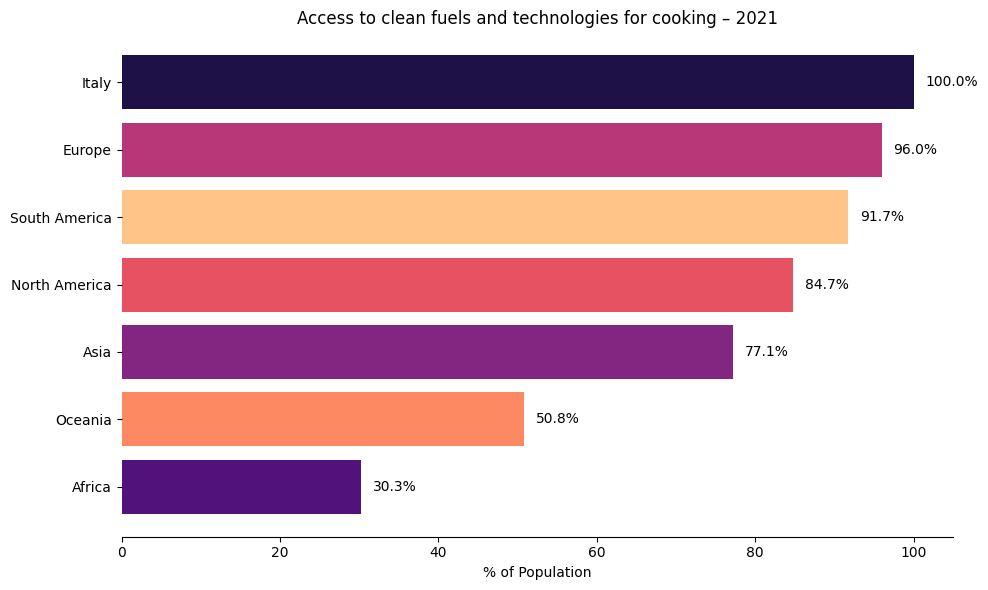

In [17]:
indicator = "Access to clean fuels and technologies for cooking (% of population)"
selected_year = 2021

# Filtra i dati per il 2021
df_2021 = df_valid[df_valid['Year'] == selected_year].copy()

# Calcola la media per ciascun continente nel 2021
continent_avg = df_2021.groupby('Continent')[indicator].mean().reset_index()

# Estrai il valore per l’Italia
italy_value = df_2021[df_2021['Country Name'] == 'Italy'][indicator].values[0]
italy_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_value]})

# Combina i dati
df_bar = pd.concat([italy_row, continent_avg], ignore_index=True)

# Ordina i valori per la barra orizzontale
df_bar_sorted = df_bar.sort_values(by=indicator, ascending=True)

# Palette
entities = ['Italy'] + list(continent_avg['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))
colors = [color_map[c] for c in df_bar_sorted['Continent']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_sorted['Continent'],
    df_bar_sorted[indicator] * 100,
    color=colors
)

# Etichette
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1.5, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}%", va='center')

# Stile
plt.title(f"Access to clean fuels and technologies for cooking – {selected_year}")
plt.xlabel("% of Population")
plt.xlim(0, 105)

# Pulizia grafica
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

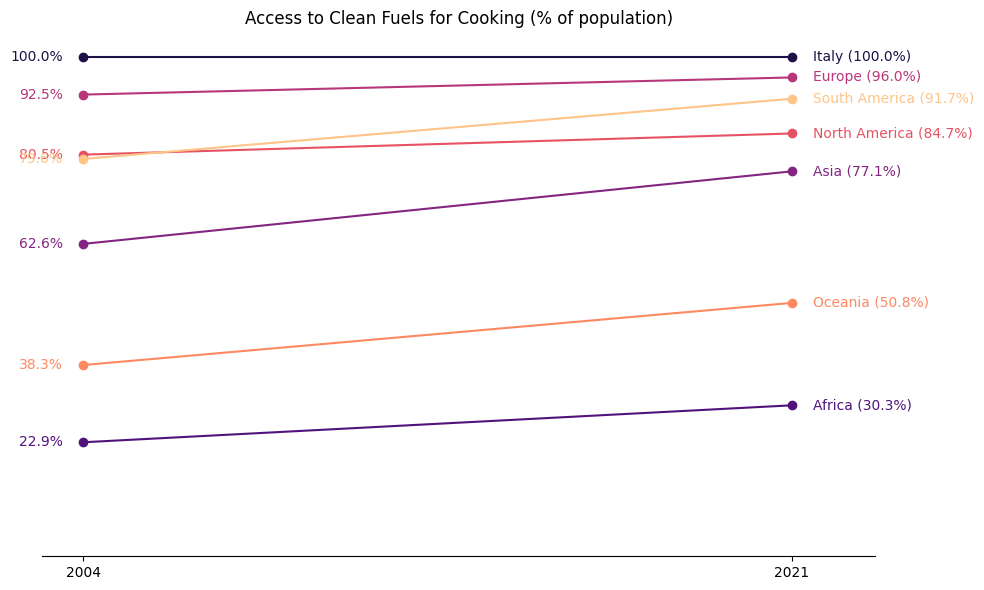

In [10]:
# Prepara i dati per lo slope chart: Access to clean fuels (2004 vs 2021)
indicator = "Access to clean fuels and technologies for cooking (% of population)"
years_slope = [2004, 2021]

# Filtra i dati validi
df_valid_cleanfuels = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_cleanfuels = df_valid_cleanfuels.dropna(subset=[indicator])
df_valid_cleanfuels['Year'] = pd.to_numeric(df_valid_cleanfuels['Year'], errors='coerce')

df_slope_cf = df_valid_cleanfuels[df_valid_cleanfuels['Year'].isin(years_slope)].copy()

# Media per continente
continent_slope_cf = df_slope_cf.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dati per l’Italia
italy_slope_cf = df_slope_cf[df_slope_cf['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope_cf['Continent'] = 'Italy'

# Unione
df_slope_all_cf = pd.concat([continent_slope_cf, italy_slope_cf], ignore_index=True)
df_slope_all_cf[indicator] *= 100

# Pivot per slope plot
df_slope_pivot_cf = df_slope_all_cf.pivot(index='Continent', columns='Year', values=indicator).dropna()
df_slope_pivot_cf = df_slope_pivot_cf.loc[df_slope_pivot_cf.index.tolist()]

# Plot
plt.figure(figsize=(10, 6))
for idx in df_slope_pivot_cf.index:
    plt.plot([2004, 2021], df_slope_pivot_cf.loc[idx], marker='o', label=idx, color=color_map.get(idx, 'gray'))
    plt.text(2021 + 0.5, df_slope_pivot_cf.loc[idx, 2021], f"{idx} ({df_slope_pivot_cf.loc[idx, 2021]:.1f}%)", va='center', color=color_map.get(idx, 'gray'))
    plt.text(2004 - 0.5, df_slope_pivot_cf.loc[idx, 2004], f"{df_slope_pivot_cf.loc[idx, 2004]:.1f}%", va='center', ha='right', color=color_map.get(idx, 'gray'))

plt.xticks([2004, 2021])
plt.xlim(2003, 2023)
plt.title("Access to Clean Fuels for Cooking (% of population)")
plt.ylim(0, 105)
plt.yticks([])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.show()

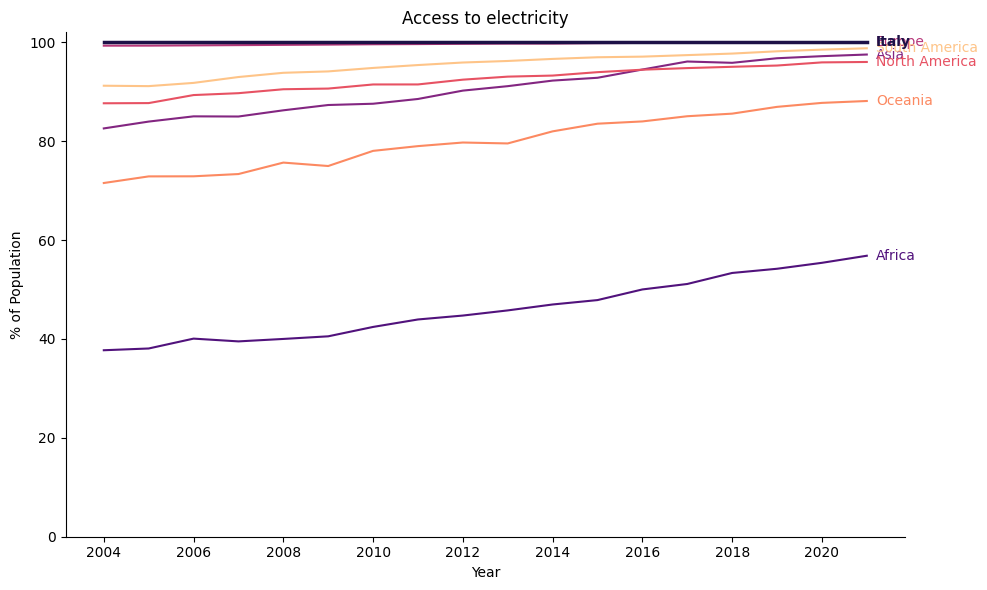

In [20]:
# LINE CHART: Access to electricity – 2004–2023

indicator = "Access to electricity (% of population)"

# Filter and prepare the data
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Compute the average value per continent per year
continent_means = df_valid.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Extract Italy's data as a separate copy
italy_data = df_valid[df_valid['Country Name'] == 'Italy'].copy()

# Convert all values to percentage format
continent_means.loc[:, indicator] = continent_means[indicator] * 100
italy_data.loc[:, indicator] = italy_data[indicator] * 100

palette = sns.color_palette("magma", n_colors=len(continent_means['Continent'].unique()) + 1)
entities = ['Italy'] + list(continent_means['Continent'].unique())
color_map = dict(zip(entities, palette))

plt.figure(figsize=(10, 6))

# Linee dei continenti
for continent in continent_means['Continent'].unique():
    subset = continent_means[continent_means['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map[continent])
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

# Linea dell’Italia
plt.plot(
    italy_data['Year'],
    italy_data[indicator],
    linewidth=2.5,
    linestyle='-',
    color=color_map['Italy']
)
plt.text(
    italy_data['Year'].max() + 0.2,
    italy_data[indicator].iloc[-1],
    'Italy',
    verticalalignment='center',
    fontweight='bold',
    color=color_map['Italy']
)

plt.title("Access to electricity")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 102)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

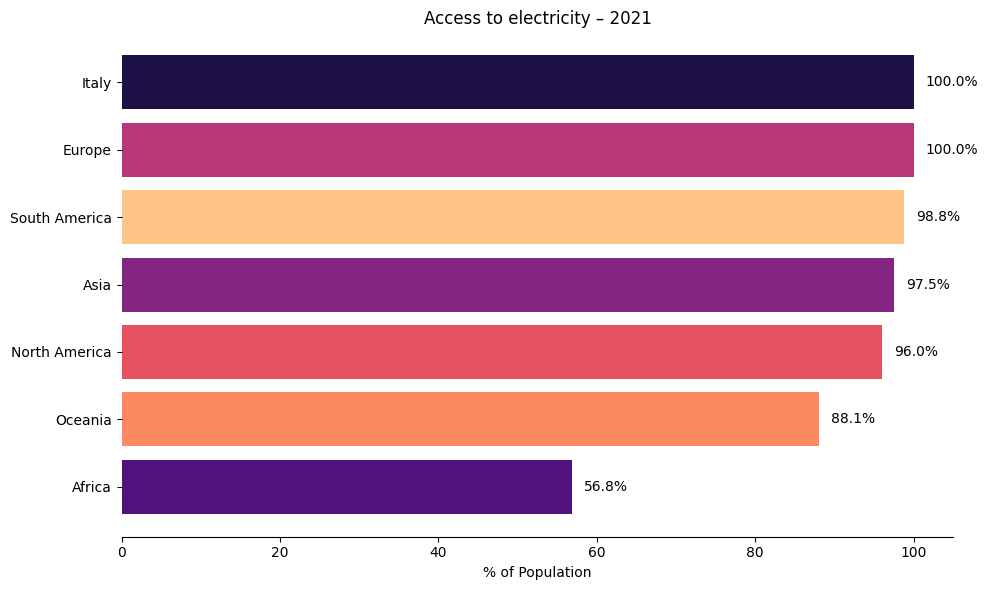

In [12]:
indicator = "Access to electricity (% of population)"
selected_year = 2021

# Filtra i dati per il 2021
df_2021 = df_valid[df_valid['Year'] == selected_year].copy()

# Calcola la media per ciascun continente nel 2021
continent_avg = df_2021.groupby('Continent')[indicator].mean().reset_index()

# Estrai il valore per l’Italia
italy_value = df_2021[df_2021['Country Name'] == 'Italy'][indicator].values[0]
italy_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_value]})

# Combina i dati
df_bar = pd.concat([italy_row, continent_avg], ignore_index=True)

# Ordina i valori per la barra orizzontale
df_bar_sorted = df_bar.sort_values(by=indicator, ascending=True)

# Palette
entities = ['Italy'] + list(continent_avg['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))
colors = [color_map[c] for c in df_bar_sorted['Continent']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_sorted['Continent'],
    df_bar_sorted[indicator] * 100,
    color=colors
)

# Etichette
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1.5, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}%", va='center')

# Stile
plt.title(f"Access to electricity – {selected_year}")
plt.xlabel("% of Population")
plt.xlim(0, 105)

# Pulizia grafica
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

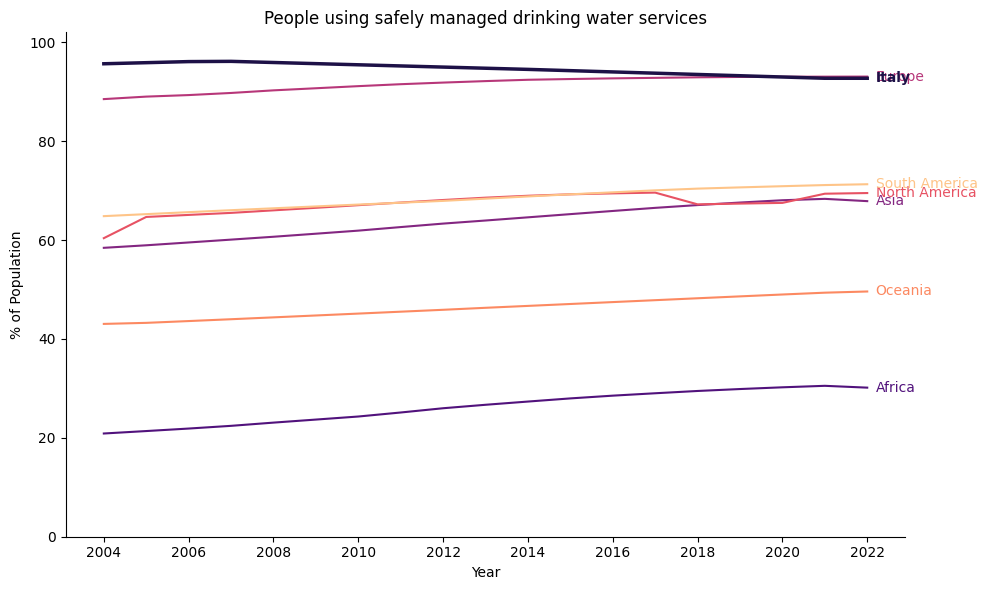

In [21]:
# LINE CHART: People using safely managed drinking water services (% of population) 

indicator = "People using safely managed drinking water services (% of population)"

# Filter and prepare the data
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Compute the average value per continent per year
continent_means = df_valid.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Extract Italy's data as a separate copy
italy_data = df_valid[df_valid['Country Name'] == 'Italy'].copy()

# Convert all values to percentage format
continent_means.loc[:, indicator] = continent_means[indicator] * 100
italy_data.loc[:, indicator] = italy_data[indicator] * 100

palette = sns.color_palette("magma", n_colors=len(continent_means['Continent'].unique()) + 1)
entities = ['Italy'] + list(continent_means['Continent'].unique())
color_map = dict(zip(entities, palette))

plt.figure(figsize=(10, 6))

# Linee dei continenti
for continent in continent_means['Continent'].unique():
    subset = continent_means[continent_means['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map[continent])
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

# Linea dell’Italia
plt.plot(
    italy_data['Year'],
    italy_data[indicator],
    linewidth=2.5,
    linestyle='-',
    color=color_map['Italy']
)
plt.text(
    italy_data['Year'].max() + 0.2,
    italy_data[indicator].iloc[-1],
    'Italy',
    verticalalignment='center',
    fontweight='bold',
    color=color_map['Italy']
)

plt.title("People using safely managed drinking water services")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 102)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

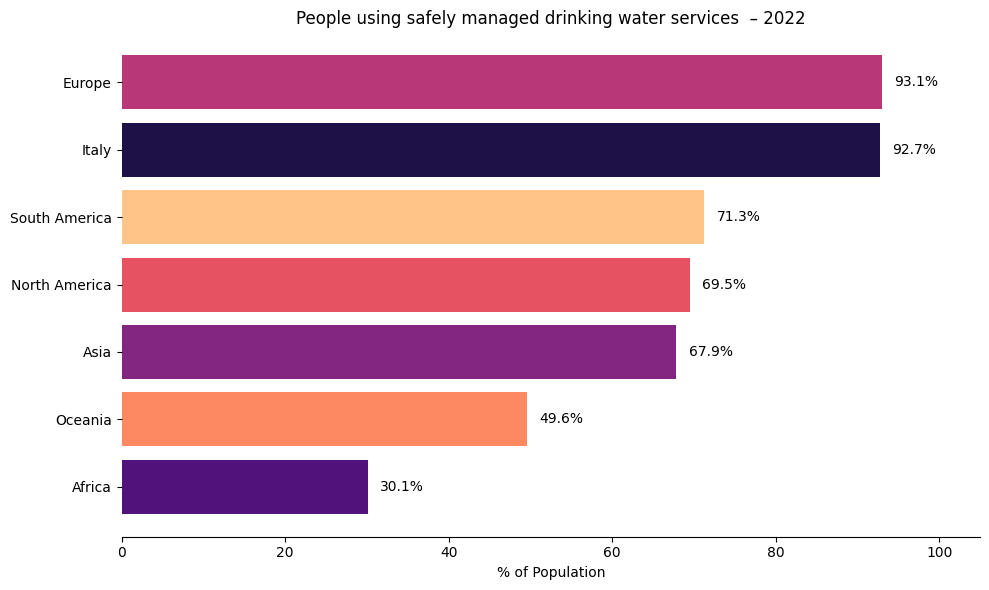

In [24]:
indicator = "People using safely managed drinking water services (% of population)"

selected_year = 2022

# Filtra i dati per il 2022
df_2022 = df_valid[df_valid['Year'] == selected_year].copy()

# Calcola la media per ciascun continente nel 2022
continent_avg = df_2022.groupby('Continent')[indicator].mean().reset_index()

# Estrai il valore per l’Italia
italy_value = df_2022[df_2022['Country Name'] == 'Italy'][indicator].values[0]
italy_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_value]})

# Combina i dati
df_bar = pd.concat([italy_row, continent_avg], ignore_index=True)

# Ordina i valori per la barra orizzontale
df_bar_sorted = df_bar.sort_values(by=indicator, ascending=True)

# Palette
entities = ['Italy'] + list(continent_avg['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))
colors = [color_map[c] for c in df_bar_sorted['Continent']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_sorted['Continent'],
    df_bar_sorted[indicator] * 100,
    color=colors
)

# Etichette
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1.5, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}%", va='center')

# Stile
plt.title(f"People using safely managed drinking water services  – {selected_year}")
plt.xlabel("% of Population")
plt.xlim(0, 105)

# Pulizia grafica
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

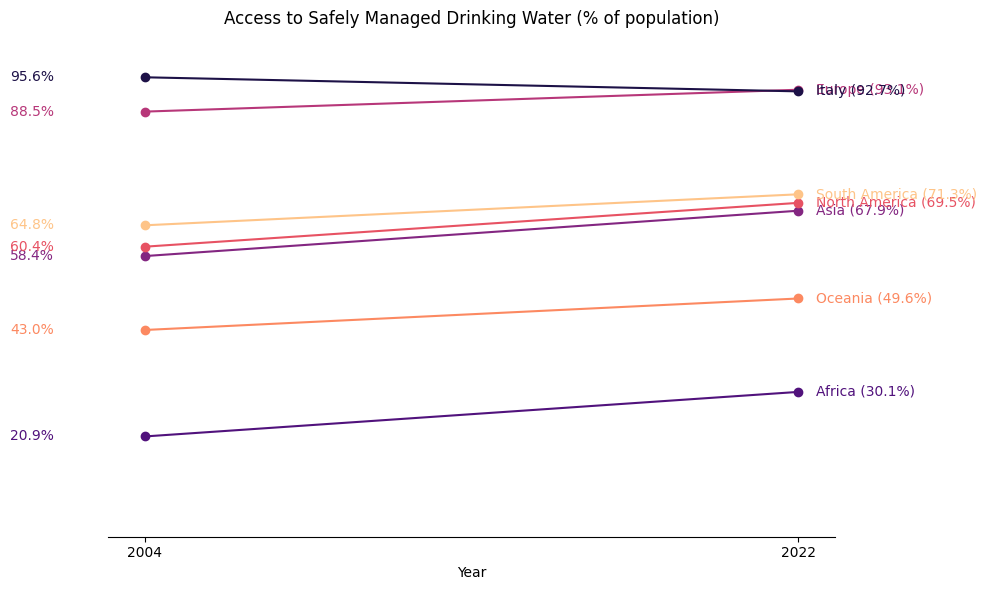

In [23]:
# Indicatore
indicator = "People using safely managed drinking water services (% of population)"
years_slope = [2004, 2022]

# Prepara i dati
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Filtra solo i due anni
df_slope = df_valid[df_valid['Year'].isin(years_slope)].copy()

# Media per continente
continent_slope = df_slope.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dato Italia
italy_slope = df_slope[df_slope['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope['Continent'] = 'Italy'

# Combina dati
df_slope_all = pd.concat([continent_slope, italy_slope], ignore_index=True)
df_slope_all[indicator] = df_slope_all[indicator] * 100  # percentuale

# Pivot per lo slope chart
df_slope_pivot = df_slope_all.pivot(index='Continent', columns='Year', values=indicator).dropna()

# Definisci la palette coerente
entities = ['Italy'] + list(continent_slope['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))

# Plot slope chart
plt.figure(figsize=(10, 6))

for idx in df_slope_pivot.index:
    plt.plot([2004, 2022], df_slope_pivot.loc[idx], marker='o', color=color_map.get(idx, 'gray'))
    plt.text(2022 + 0.5, df_slope_pivot.loc[idx, 2022],
             f"{idx} ({df_slope_pivot.loc[idx, 2022]:.1f}%)", va='center', color=color_map.get(idx, 'gray'))
    plt.text(2002 - 0.5, df_slope_pivot.loc[idx, 2004],
             f"{df_slope_pivot.loc[idx, 2004]:.1f}%", va='center', ha='right', color=color_map.get(idx, 'gray'))

# Etichette asse X e stile
plt.xticks([2004, 2022])
plt.xlim(2003, 2023)
plt.title("Access to Safely Managed Drinking Water (% of population)")
plt.xlabel("Year")
plt.ylim(0, 105)
plt.yticks([])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Poverty and Inequality

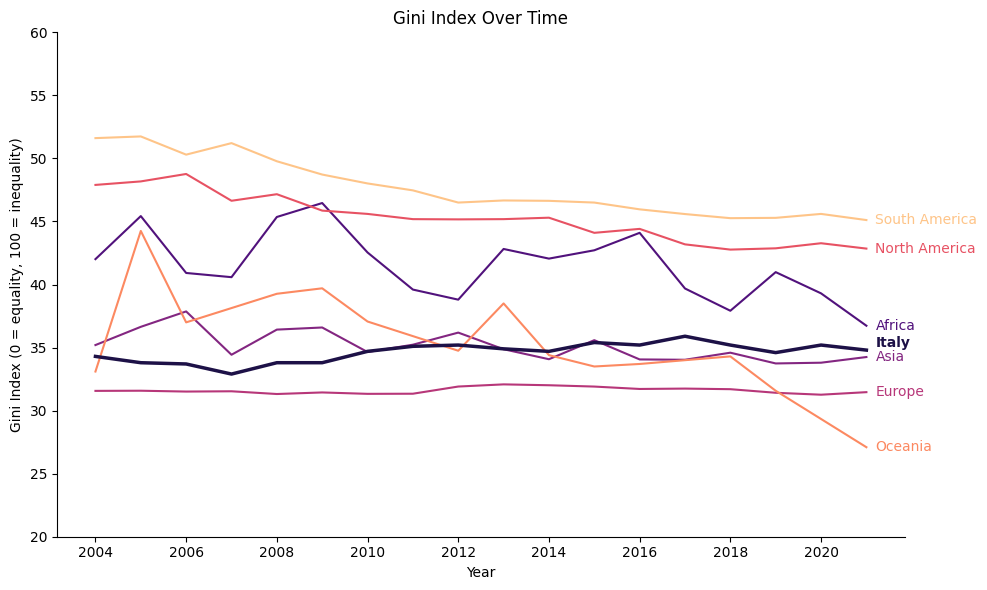

In [25]:
indicator = "Gini index"

# Prepara i dati
df_valid_gini = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_gini = df_valid_gini.dropna(subset=[indicator])
df_valid_gini['Year'] = pd.to_numeric(df_valid_gini['Year'], errors='coerce')

df_valid_gini = df_valid_gini[df_valid_gini['Year'] <= 2021]

# Media per continente e dati Italia
continent_means_gini = df_valid_gini.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
italy_data_gini = df_valid_gini[df_valid_gini['Country Name'] == 'Italy'].copy()

# Palette coerente
entities_gini = ['Italy'] + list(continent_means_gini['Continent'].unique())
palette_gini = sns.color_palette("magma", n_colors=len(entities_gini))
color_map_gini = dict(zip(entities_gini, palette_gini))

# ---- LINE CHART GINI INDEX (2004–2023) ----
plt.figure(figsize=(10, 6))

for continent in continent_means_gini['Continent'].unique():
    subset = continent_means_gini[continent_means_gini['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map_gini[continent])
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=color_map_gini[continent]
        )

plt.plot(
    italy_data_gini['Year'],
    italy_data_gini[indicator],
    linewidth=2.5,
    linestyle='-',
    color=color_map_gini['Italy']
)
plt.text(
    italy_data_gini['Year'].max() + 0.2,
    italy_data_gini[indicator].iloc[-1],
    'Italy',
    verticalalignment='bottom',
    fontweight='bold',
    color=color_map_gini['Italy']
)

plt.title("Gini Index Over Time")
plt.xlabel("Year")
plt.ylabel("Gini Index (0 = equality, 100 = inequality)")
plt.ylim(20, 60)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


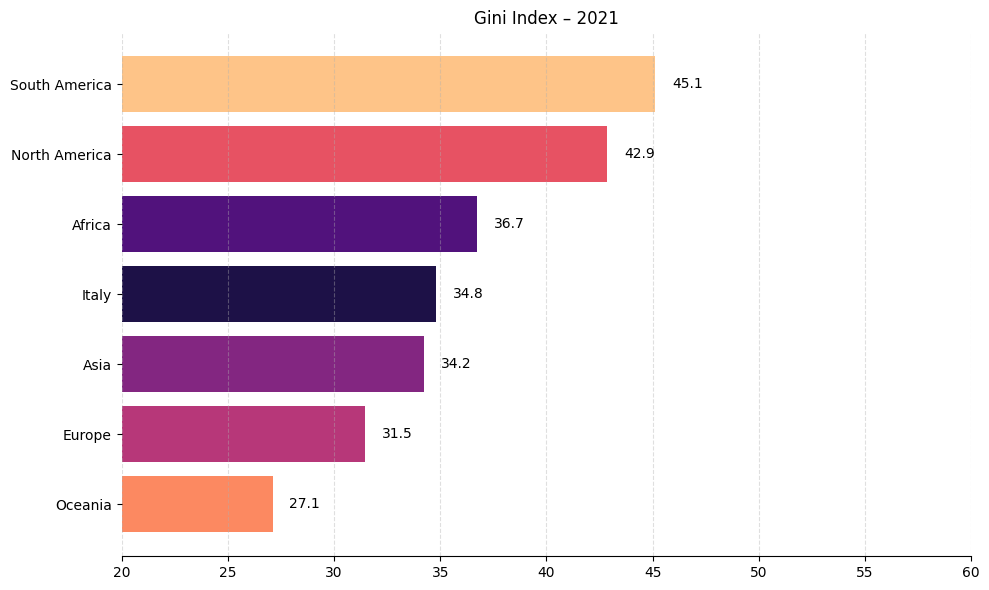

In [26]:
# BAR CHART ORIZZONTALE – Gini Index nel 2021

# Filtra i dati per il 2021
selected_year = 2021
df_2021_gini = df_valid_gini[df_valid_gini['Year'] == selected_year]

# Media per continente
continent_avg_2021_gini = df_2021_gini.groupby('Continent')[indicator].mean().reset_index()

# Valore Italia
italy_value_2021_gini = df_2021_gini[df_2021_gini['Country Name'] == 'Italy'][indicator].values[0]
italy_row_gini = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_value_2021_gini]})

# Unione
df_bar_gini = pd.concat([italy_row_gini, continent_avg_2021_gini], ignore_index=True)
df_bar_sorted_gini = df_bar_gini.sort_values(by=indicator, ascending=True)

# Colori coerenti
ordered_labels = df_bar_sorted_gini['Continent'].tolist()
bar_colors = [color_map_gini[label] for label in ordered_labels]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_sorted_gini['Continent'],
    df_bar_sorted_gini[indicator],
    color=bar_colors
)

# Etichette accanto alle barre
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.8, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}", va='center')

# Stile
plt.title("Gini Index – 2021")
plt.xlim(20, 60)
plt.grid(axis='x', linestyle='--', alpha=0.4)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

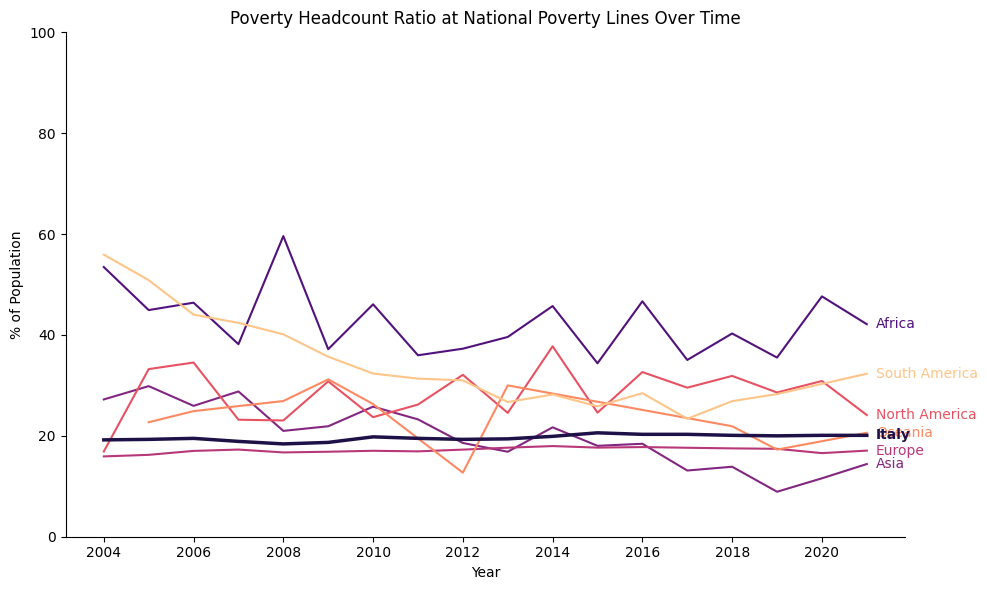

In [27]:
indicator = "Poverty headcount ratio at national poverty lines (% of population)"

# Prepara i dati
df_valid_poverty = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_poverty = df_valid_poverty.dropna(subset=[indicator])
df_valid_poverty['Year'] = pd.to_numeric(df_valid_poverty['Year'], errors='coerce')

# Trasforma in percentuale (da frazioni)
df_valid_poverty[indicator] *= 100

# Limita al 2021 (incluso)
df_valid_poverty = df_valid_poverty[df_valid_poverty['Year'] <= 2021]

# Calcola medie per continente e dati Italia
continent_means_poverty = df_valid_poverty.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
italy_data_poverty = df_valid_poverty[df_valid_poverty['Country Name'] == 'Italy'].copy()

# Palette coerente
entities = ['Italy'] + list(continent_means_poverty['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))

# Plot line chart
plt.figure(figsize=(10, 6))

# Linee per i continenti
for continent in continent_means_poverty['Continent'].unique():
    subset = continent_means_poverty[continent_means_poverty['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map[continent])
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

# Linea Italia
plt.plot(
    italy_data_poverty['Year'],
    italy_data_poverty[indicator],
    linewidth=2.5,
    linestyle='-',
    color=color_map['Italy']
)
plt.text(
    italy_data_poverty['Year'].max() + 0.2,
    italy_data_poverty[indicator].iloc[-1],
    'Italy',
    verticalalignment='center',
    fontweight='bold',
    color=color_map['Italy']
)

# Personalizzazione
plt.title("Poverty Headcount Ratio at National Poverty Lines Over Time")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 100)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

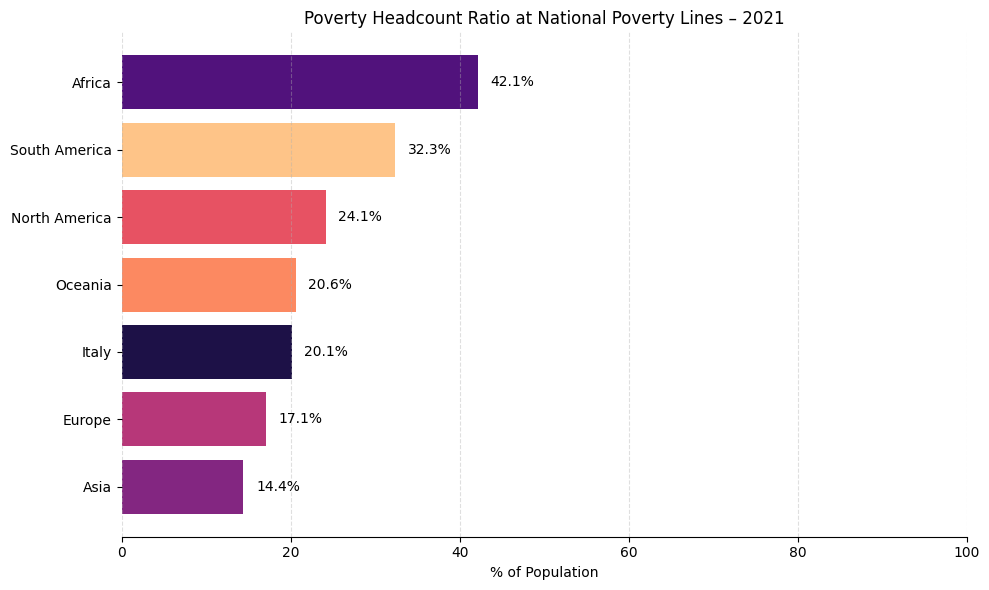

In [28]:
# Filtra i dati per il 2021
selected_year = 2021
df_2021_poverty = df_valid_poverty[df_valid_poverty['Year'] == selected_year]

# Calcola la media per continente
continent_avg_2021 = df_2021_poverty.groupby('Continent')[indicator].mean().reset_index()

# Estrai il valore per l’Italia
italy_val_2021 = df_2021_poverty[df_2021_poverty['Country Name'] == 'Italy'][indicator].values[0]
italy_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_val_2021]})

# Combina i dati
df_bar = pd.concat([italy_row, continent_avg_2021], ignore_index=True)
df_bar_sorted = df_bar.sort_values(by=indicator, ascending=True)

# Ordina i nomi per associare i colori
ordered_labels = df_bar_sorted['Continent'].tolist()
bar_colors = [color_map[label] for label in ordered_labels]

# Plot del bar chart orizzontale
plt.figure(figsize=(10, 6))
bars = plt.barh(df_bar_sorted['Continent'], df_bar_sorted[indicator], color=bar_colors)

# Etichette a destra delle barre
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1.5, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}%", va='center')

# Stile grafico
plt.title("Poverty Headcount Ratio at National Poverty Lines – 2021")
plt.xlabel("% of Population")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Pulizia bordi
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

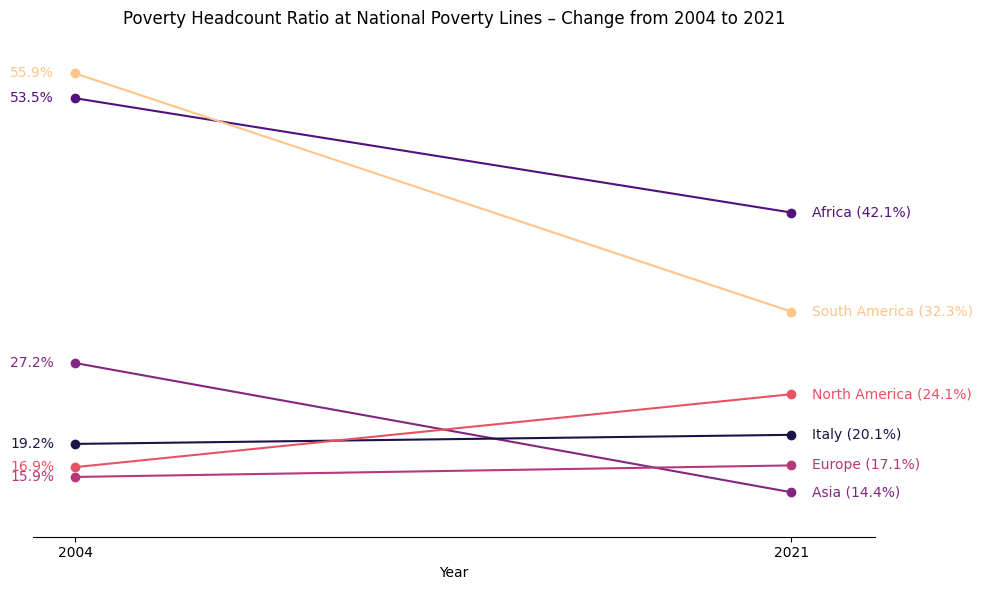

In [29]:
indicator = "Poverty headcount ratio at national poverty lines (% of population)"
# Prepara i dati per lo slope chart: 2004 vs 2021
years_slope = [2004, 2021]
df_slope_poverty = df_valid_poverty[df_valid_poverty['Year'].isin(years_slope)].copy()

# Media per continente
continent_slope_poverty = df_slope_poverty.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dato per l’Italia
italy_slope_poverty = df_slope_poverty[df_slope_poverty['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope_poverty['Continent'] = 'Italy'

# Unione
df_slope_all = pd.concat([continent_slope_poverty, italy_slope_poverty], ignore_index=True)

# Pivot per slope chart
df_slope_pivot = df_slope_all.pivot(index='Continent', columns='Year', values=indicator).dropna()

# Plot
plt.figure(figsize=(10, 6))
for idx in df_slope_pivot.index:
    plt.plot([2004, 2021], df_slope_pivot.loc[idx], marker='o', label=idx, color=color_map.get(idx, 'gray'))
    plt.text(2021 + 0.5, df_slope_pivot.loc[idx, 2021], f"{idx} ({df_slope_pivot.loc[idx, 2021]:.1f}%)",
             va='center', color=color_map.get(idx, 'gray'))
    plt.text(2004 - 0.5, df_slope_pivot.loc[idx, 2004], f"{df_slope_pivot.loc[idx, 2004]:.1f}%",
             va='center', ha='right', color=color_map.get(idx, 'gray'))
    
plt.xticks([2004, 2021])
plt.xlim(2003, 2023)
plt.title("Poverty Headcount Ratio at National Poverty Lines – Change from 2004 to 2021")
plt.xlabel("Year")
plt.ylim(10, 60)
plt.yticks([])
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Rimuovi bordi superflui
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()